In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


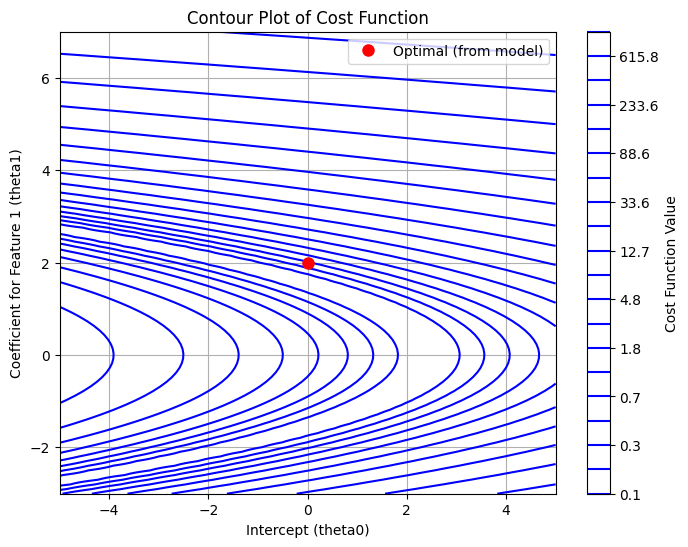

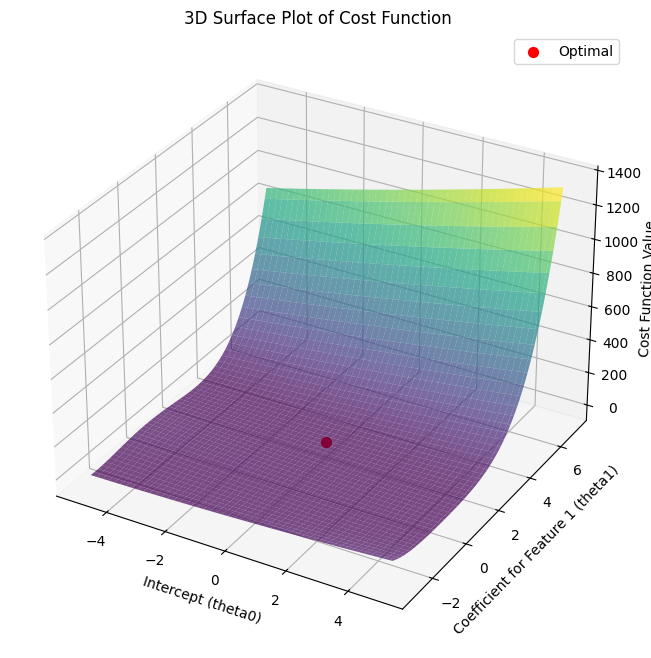

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # Or your preferred method

# 1. Prepare your data (replace with your actual data)
X = np.random.rand(100, 2)  # 100 samples, 2 features (for simplicity)
y = 2*X[:, 0] + 3*X[:, 1] + np.random.randn(100) * 0.1 # Example relationship with noise

# 2. Train your linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Define the cost function (Mean Squared Error for linear regression)
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

# 4. Create a grid of theta values to evaluate the cost function
theta0_vals = np.linspace(model.intercept_ - 5, model.intercept_ + 5, 100)  # Adjust range as needed
theta1_vals = np.linspace(model.coef_[0] - 5, model.coef_[0] + 5, 100)      # Adjust range as needed

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 5. Calculate the cost function for each combination of theta values
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta = np.array([theta0, theta1]) # We are only varying these two
        # We need to create a dummy X matrix where the second column uses theta1
        # and the other columns are held constant at the mean value.
        X_dummy = np.copy(X)
        X_dummy[:, 0] = 1 # Intercept
        X_dummy[:, 1] = theta1 # Varying theta1
        J_vals[i, j] = cost_function(X_dummy, y, theta)

# 6. Create the contour plot
plt.figure(figsize=(8, 6))
plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=np.logspace(-1, 3, 20), colors='blue') # Logarithmic levels for better visualization
plt.xlabel('Intercept (theta0)')
plt.ylabel('Coefficient for Feature 1 (theta1)')
plt.title('Contour Plot of Cost Function')
plt.plot(model.intercept_, model.coef_[0], 'ro', markersize=8, label='Optimal (from model)') # Mark the optimal point
plt.legend()
plt.colorbar(label='Cost Function Value') # Add a colorbar for interpretation
plt.grid(True)
plt.show()

# 7. (Optional) 3D Surface Plot (for a more complete view, but harder to interpret)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(Theta0, Theta1, J_vals.T, cmap='viridis', alpha=0.7)
ax.scatter(model.intercept_, model.coef_[0], cost_function(X, y, np.array([model.intercept_, model.coef_[0]])), c='red', marker='o', s=50, label='Optimal')
ax.set_xlabel('Intercept (theta0)')
ax.set_ylabel('Coefficient for Feature 1 (theta1)')
ax.set_zlabel('Cost Function Value')
ax.set_title('3D Surface Plot of Cost Function')
ax.legend()
plt.show()